# Colab options

In [1]:
!pip install kaggle
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# Downloading spotify dataset
!kaggle datasets download edumucelli/spotifys-worldwide-daily-song-ranking

# Unzipping file
!unzip spotifys-worldwide-daily-song-ranking.zip
!unzip top-tracks-of-2017.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes
spotifys-worldwide-daily-song-ranking.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  spotifys-worldwide-daily-song-ranking.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                
unzip:  cannot find or open top-tracks-of-2017.zip, top-tracks-of-2017.zip.zip or top-tracks-of-2017.zip.ZIP.


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker



pd.options.display.float_format = '{:,g}'.format

%matplotlib inline

plt.style.use('seaborn-darkgrid')

# Data description

In [3]:
filepath = 'data.csv'

In [4]:
daily_df = pd.read_csv(filepath)
daily_df['Streams'] = daily_df['Streams'].astype('float64')
print( 'Rows: ', daily_df.shape[0], 'Columns: ' , daily_df.shape[1])
print('# of unique Artist: ' , len(daily_df.Artist.unique()) )# 6629 unique Artist in Top 200 In 2017
print('# of unique Tracks: ' , len(daily_df.loc[:, 'Track Name'].unique()) )# 6629 unique Artist in Top 200 In 2017
column_na = [ " ".join([column, str(value)]) for column, value in daily_df.isna().sum().to_dict().items()]
print('Missing Values: ' + " , ".join(column_na))
daily_df.head()

Rows:  3441197 Columns:  7
# of unique Artist:  6629
# of unique Tracks:  18598
Missing Values: Position 0 , Track Name 657 , Artist 657 , Streams 0 , URL 8 , Date 0 , Region 0


,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,"19,272",https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,"19,270",https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,"15,761",https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,"14,954",https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,"14,269",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


## Cleaning up Nan values

I chose to keep rows which had at least a URL as the URL could be used as a proxy id, it does mean an artist-song could show up multiple times with the seperate urls but with for $657/6629 < 1\%$ of tracks are affected. I did delete rows in which no URL was given.

In [5]:
nan_rows = daily_df[daily_df.isna().any(axis=1)]

nan_rows.sort_values(by='Position')

,Position,Track Name,Artist,Streams,URL,Date,Region
946915,1,NaN,NaN,"28,353",https://open.spotify.com/track/1YqcGlCHNquxBhl...,2017-11-11,cr
947515,1,NaN,NaN,"25,467",https://open.spotify.com/track/1YqcGlCHNquxBhl...,2017-11-14,cr
1948960,1,NaN,NaN,"40,492",https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-20,pl
947315,1,NaN,NaN,"23,826",https://open.spotify.com/track/1YqcGlCHNquxBhl...,2017-11-13,cr
455986,1,NaN,NaN,"3,457",https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-20,lt
...,...,...,...,...,...,...,...
1935553,194,NaN,NaN,"3,937",https://open.spotify.com/track/3woM5duQfkDdoXw...,2017-05-10,pl
410993,194,NaN,NaN,"15,685",https://open.spotify.com/track/6Br5mChPdgQNmLF...,2017-07-22,it
2476903,195,NaN,NaN,"13,967",https://open.spotify.com/track/6Br5mChPdgQNmLF...,2017-07-23,es
1073311,197,NaN,NaN,"8,853",https://open.spotify.com/track/6Br5mChPdgQNmLF...,2017-07-23,cl


In [6]:
print(nan_rows.loc[nan_rows['URL'].isna()])
nan_rows = nan_rows.dropna(axis=0, subset=['URL'])
nan_rows

         Position Track Name Artist  Streams  URL        Date Region
2693622        23        NaN    NaN  123,366  NaN  2017-06-30     nl
2693661        62        NaN    NaN   72,756  NaN  2017-06-30     nl
2713878        79        NaN    NaN   42,943  NaN  2017-10-09     nl
2714150       151        NaN    NaN   22,791  NaN  2017-10-10     nl
2894298       102        NaN    NaN    6,402  NaN  2017-11-25     sg
2894584       188        NaN    NaN    4,197  NaN  2017-11-26     sg
3432077        81        NaN    NaN    3,397  NaN  2017-11-25     hk
3432383       187        NaN    NaN    1,997  NaN  2017-11-26     hk


,Position,Track Name,Artist,Streams,URL,Date,Region
39428,29,NaN,NaN,"7,362",https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-20,ec
39456,57,NaN,NaN,"4,426",https://open.spotify.com/track/4JAyIDXOqNM6qHu...,2017-07-20,ec
39463,64,NaN,NaN,"4,069",https://open.spotify.com/track/3bVbQvGVIe4n24A...,2017-07-20,ec
39490,91,NaN,NaN,"3,238",https://open.spotify.com/track/3eFJqPe8VUYrABb...,2017-07-20,ec
39631,32,NaN,NaN,"7,409",https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-21,ec
...,...,...,...,...,...,...,...
3406612,16,NaN,NaN,"9,322",https://open.spotify.com/track/4JAyIDXOqNM6qHu...,2017-07-21,hk
3406633,37,NaN,NaN,"6,452",https://open.spotify.com/track/3eFJqPe8VUYrABb...,2017-07-21,hk
3406651,55,NaN,NaN,"5,413",https://open.spotify.com/track/3bVbQvGVIe4n24A...,2017-07-21,hk
3406883,87,NaN,NaN,"3,426",https://open.spotify.com/track/6Br5mChPdgQNmLF...,2017-07-22,hk


In [7]:
grouped_nans = nan_rows.groupby(['URL','Position', 'Date', 'Region'], as_index=False).sum()
grouped_nans['Artist'] = 'None'
grouped_nans['Track Name'] = 'None'
grouped_nans

,URL,Position,Date,Region,Streams,Artist,Track Name
0,https://open.spotify.com/track/1YqcGlCHNquxBhl...,1,2017-11-09,cr,"25,054",None,None
1,https://open.spotify.com/track/1YqcGlCHNquxBhl...,1,2017-11-10,cr,"27,840",None,None
2,https://open.spotify.com/track/1YqcGlCHNquxBhl...,1,2017-11-11,cr,"28,353",None,None
3,https://open.spotify.com/track/1YqcGlCHNquxBhl...,1,2017-11-12,cr,"24,823",None,None
4,https://open.spotify.com/track/1YqcGlCHNquxBhl...,1,2017-11-13,cr,"23,826",None,None
...,...,...,...,...,...,...,...
644,https://open.spotify.com/track/6Br5mChPdgQNmLF...,192,2017-07-23,fr,"16,888",None,None
645,https://open.spotify.com/track/6Br5mChPdgQNmLF...,194,2017-07-22,it,"15,685",None,None
646,https://open.spotify.com/track/6Br5mChPdgQNmLF...,195,2017-07-23,es,"13,967",None,None
647,https://open.spotify.com/track/6Br5mChPdgQNmLF...,197,2017-07-23,cl,"8,853",None,None


In [8]:
daily_df = daily_df.dropna()

URL_last_used = daily_df.groupby(['Track Name', 'Artist', 'Region'], as_index=False)['URL'].last()
daily_df = daily_df.groupby(['Position', 'Track Name', 'Artist', 'Date', 'Region'], as_index=False).sum()
daily_df = pd.merge(daily_df, URL_last_used)
daily_df

,Position,Track Name,Artist,Date,Region,Streams,URL
0,1,...Ready For It?,Taylor Swift,2017-09-04,us,1.51015e+06,https://open.spotify.com/track/2yLa0QULdQr0qAI...
1,1,...Ready For It?,Taylor Swift,2017-09-05,us,1.59742e+06,https://open.spotify.com/track/2yLa0QULdQr0qAI...
2,2,...Ready For It?,Taylor Swift,2017-09-06,us,1.40616e+06,https://open.spotify.com/track/2yLa0QULdQr0qAI...
3,2,...Ready For It?,Taylor Swift,2017-09-07,us,1.27173e+06,https://open.spotify.com/track/2yLa0QULdQr0qAI...
4,3,...Ready For It?,Taylor Swift,2017-09-03,us,1.22915e+06,https://open.spotify.com/track/2yLa0QULdQr0qAI...
...,...,...,...,...,...,...,...
3440535,200,我想要說,Evan Yo,2017-01-19,tw,"2,208",https://open.spotify.com/track/4laqZlxlNBvOUEK...
3440536,200,那誰,William So,2017-03-31,hk,"1,934",https://open.spotify.com/track/6JULWULk2iLzF0G...
3440537,200,醒了 - 國語,Miriam Yeung,2017-07-20,tw,"2,587",https://open.spotify.com/track/4uOgUACe5GuEw5c...
3440538,200,飄向北方,Namewee,2017-12-30,hk,"1,992",https://open.spotify.com/track/5mS0BGxAAebA3am...


In [9]:
daily_df = pd.concat([daily_df, grouped_nans])
daily_df = daily_df.sort_values(by=['Date','Region','Position']).reset_index(drop=True)
daily_df

,Position,Track Name,Artist,Date,Region,Streams,URL
0,1,Chantaje,Shakira,2017-01-01,ar,"253,019",https://open.spotify.com/track/6mICuAdrwEjh6Y6...
1,2,Vente Pa' Ca,Ricky Martin,2017-01-01,ar,"223,988",https://open.spotify.com/track/7DM4BPaS7uofFul...
2,3,Reggaetón Lento (Bailemos),CNCO,2017-01-01,ar,"210,943",https://open.spotify.com/track/3AEZUABDXNtecAO...
3,4,Safari,J Balvin,2017-01-01,ar,"173,865",https://open.spotify.com/track/6rQSrBHf7HlZjtc...
4,5,Shaky Shaky,Daddy Yankee,2017-01-01,ar,"153,956",https://open.spotify.com/track/58IL315gMSTD37D...
...,...,...,...,...,...,...,...
3441184,196,Swalla (feat. Nicki Minaj & Ty Dolla $ign),Jason Derulo,2018-01-09,uy,"1,162",https://open.spotify.com/track/6kex4EBAj0WHXDK...
3441185,197,Mi Gente (feat. Beyoncé),J Balvin,2018-01-09,uy,"1,160",https://open.spotify.com/track/7fwXWKdDNI5IutO...
3441186,198,Flaca,Andrés Calamaro,2018-01-09,uy,"1,151",https://open.spotify.com/track/1p7m9H4H8s0Y7Sg...
3441187,199,Lumbra,Cali Y El Dandee,2018-01-09,uy,"1,146",https://open.spotify.com/track/6VHdcVbiKLYYOcM...


# General Data Analysis

## Total Streams by Region

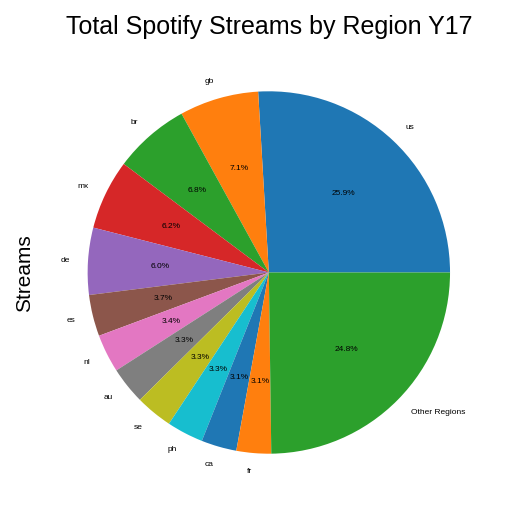

In [10]:
# We can quickly plot for the total spotify streams by region
fig, ax = plt.subplots(dpi= 150)
fig.set_facecolor("w")

total_streams_by_region = daily_df.groupby(['Region'], as_index=True).sum()['Streams'].sort_values( ascending=False)[1:]#.reset_index(drop=True)

thresh = 3E9
temp = total_streams_by_region.copy()
total_streams_by_rel_regions = temp[temp > thresh]
total_streams_by_rel_regions['Other Regions'] = temp[temp <= thresh].sum()

ax = total_streams_by_rel_regions.plot(y = 'Streams',kind = 'pie',  autopct='%1.1f%%', startangle=0, fontsize=4, textprops={'color':"k", 'weight': 'normal'})
ax.tick_params(axis='x', labelrotation = 45)


ax.set_ylabel('Streams', color = 'k')
ax.set_title("Total Spotify Streams by Region Y17", color ='k')

plt.show()

In [11]:
# Below is the regions we care to plot
rel_regions = total_streams_by_rel_regions.index.values[:-1] # Feel free to try your own regions of interest , other regions will be grouped into Other Regions
other_regions = 'Other Regions'
rel_regions

array(['us', 'gb', 'br', 'mx', 'de', 'es', 'nl', 'au', 'se', 'ph', 'ca',
       'fr'], dtype=object)

In [12]:
# Here we want to reassign song regions to the ones we care to plot
daily_df_copy = daily_df.copy()
daily_df_copy = daily_df_copy.loc[daily_df_copy.Region != 'global']

# Capturing subset with just the relevant regions
rel_regions_df = pd.concat([daily_df_copy[daily_df_copy.Region == region] for region in rel_regions])

# left Outer joining the full dataset with the relevant regions
# to get the "Other Regions" group subset
other_regions_df = pd.merge(daily_df_copy, rel_regions_df, how="outer", indicator=True).query('_merge=="left_only"', )
other_regions_df = other_regions_df.drop(columns=[other_regions_df.columns[-1]])
other_regions_df.Region = other_regions # Reassigning to "Other Regions" 

# Concatenating the relevant regions and other regions dataframe
relevant_daily = pd.concat([rel_regions_df, other_regions_df])
relevant_daily = relevant_daily.reset_index(drop=True)
relevant_daily

,Position,Track Name,Artist,Date,Region,Streams,URL
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,2017-01-01,us,1.37149e+06,https://open.spotify.com/track/4Km5HrUvYTaSUfi...
1,2,Fake Love,Drake,2017-01-01,us,1.18007e+06,https://open.spotify.com/track/343YBumqHu19cGo...
2,3,Starboy,The Weeknd,2017-01-01,us,1.06435e+06,https://open.spotify.com/track/5aAx2yezTd8zXrk...
3,4,Closer,The Chainsmokers,2017-01-01,us,1.01049e+06,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...
4,5,Black Beatles,Rae Sremmurd,2017-01-01,us,"874,289",https://open.spotify.com/track/6fujklziTHa8uoM...
...,...,...,...,...,...,...,...
3367384,196,Swalla (feat. Nicki Minaj & Ty Dolla $ign),Jason Derulo,2018-01-09,Other Regions,"1,162",https://open.spotify.com/track/6kex4EBAj0WHXDK...
3367385,197,Mi Gente (feat. Beyoncé),J Balvin,2018-01-09,Other Regions,"1,160",https://open.spotify.com/track/7fwXWKdDNI5IutO...
3367386,198,Flaca,Andrés Calamaro,2018-01-09,Other Regions,"1,151",https://open.spotify.com/track/1p7m9H4H8s0Y7Sg...
3367387,199,Lumbra,Cali Y El Dandee,2018-01-09,Other Regions,"1,146",https://open.spotify.com/track/6VHdcVbiKLYYOcM...


In [13]:
# Grouping and Pivoting to get daily streams by region data
daily_streams_by_region = relevant_daily.groupby(['Date','Region'], as_index= True)['Streams'].sum()
daily_streams_by_region = daily_streams_by_region.unstack('Region')
daily_streams_by_region = daily_streams_by_region.reindex(np.append([other_regions],rel_regions), axis = 1)
daily_streams_by_region

Region,Other Regions,us,gb,br,mx,de,es,nl,au,se,ph,ca,fr
Date,,,,,,,,,,,,,
2017-01-01,4.58052e+07,5.51391e+07,1.17048e+07,1.41063e+07,1.44302e+07,1.17518e+07,6.02063e+06,4.81809e+06,5.37778e+06,5.73485e+06,6.63624e+06,6.60543e+06,5.94305e+06
2017-01-02,4.78316e+07,4.88948e+07,1.34172e+07,1.37885e+07,1.29671e+07,1.28199e+07,7.7419e+06,6.3014e+06,6.39008e+06,7.09584e+06,7.66366e+06,5.58027e+06,6.28025e+06
2017-01-03,5.04938e+07,5.51688e+07,1.45101e+07,1.41627e+07,1.41252e+07,1.26434e+07,8.02174e+06,6.36352e+06,6.64908e+06,7.10857e+06,8.27753e+06,6.15778e+06,5.88318e+06
2017-01-04,5.1709e+07,5.59399e+07,1.48508e+07,1.44481e+07,1.37237e+07,1.29152e+07,8.27214e+06,6.54237e+06,6.7954e+06,7.325e+06,8.29498e+06,6.41979e+06,6.58492e+06
2017-01-05,5.23102e+07,5.62351e+07,1.49557e+07,1.44997e+07,1.35859e+07,1.31965e+07,8.53053e+06,6.83408e+06,6.80169e+06,7.84864e+06,8.4057e+06,6.41227e+06,6.29894e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-05,7.90107e+07,7.2544e+07,1.82606e+07,2.5064e+07,1.88671e+07,1.74487e+07,1.06332e+07,8.61891e+06,1.02007e+07,7.76581e+06,8.90966e+06,8.36401e+06,9.32211e+06
2018-01-06,7.62218e+07,6.87314e+07,1.80135e+07,2.55075e+07,1.90114e+07,1.72766e+07,8.43392e+06,8.45277e+06,9.66928e+06,7.11851e+06,8.76034e+06,8.03805e+06,9.15216e+06
2018-01-07,7.03765e+07,6.37149e+07,1.64228e+07,2.13532e+07,1.66187e+07,1.43994e+07,8.73448e+06,7.8133e+06,9.45006e+06,6.13593e+06,8.43634e+06,7.66785e+06,8.13737e+06


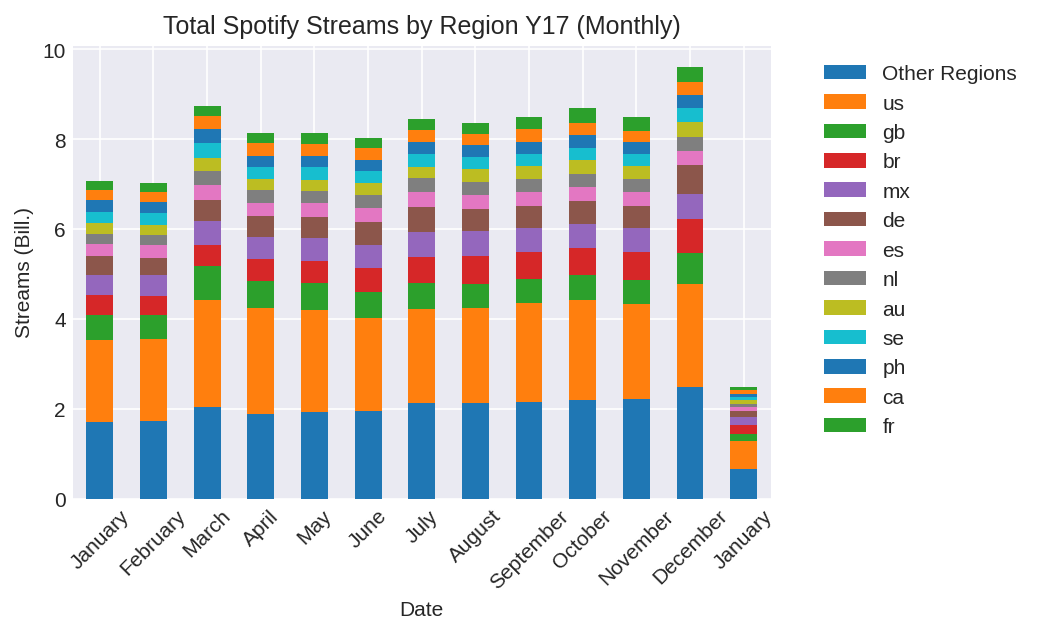

In [14]:
# Grouping and plotting for Monthly Total Data
daily_streams_by_region.index = pd.to_datetime(daily_streams_by_region.index)
monthly_streams_by_region = daily_streams_by_region.groupby(pd.Grouper(freq='M')).sum()


fig, ax = plt.subplots(dpi= 150)

monthly_streams_by_region.plot(kind = 'bar', stacked = True, ax = ax)

ax.set_xticklabels(monthly_streams_by_region.index.month_name())
ax.tick_params(axis='x', labelrotation = 45)

ax.set_ylabel('Streams (Bill.)' )

ax.set_title("Total Spotify Streams by Region Y17 (Monthly)")



ax.legend(bbox_to_anchor=(1.05, 1.),
          ncol=1, fancybox=True, shadow=True)

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1E9))))

plt.show()

## Daily Ranks Comparison

In [15]:
# Looking at Global data, feel free to change
region = "global"

In [16]:
# What is the song with the highest number of streams within a day?
print(daily_df.loc[daily_df.Region == region].iloc[(daily_df.loc[daily_df.Region == region]['Streams'].argmax())])

Position                                                      1
Track Name                   Despacito (Featuring Daddy Yankee)
Artist                                               Luis Fonsi
Date                                                 2017-05-27
Region                                                   global
Streams                                             1.13815e+07
URL           https://open.spotify.com/track/4aWmUDTfIPGksMN...
Name: 1335381, dtype: object


count        73,800
mean    1.04136e+06
std         807,741
min         325,951
25%         550,051
50%         732,480
75%      1.2235e+06
max     1.13815e+07
Name: Streams, dtype: float64


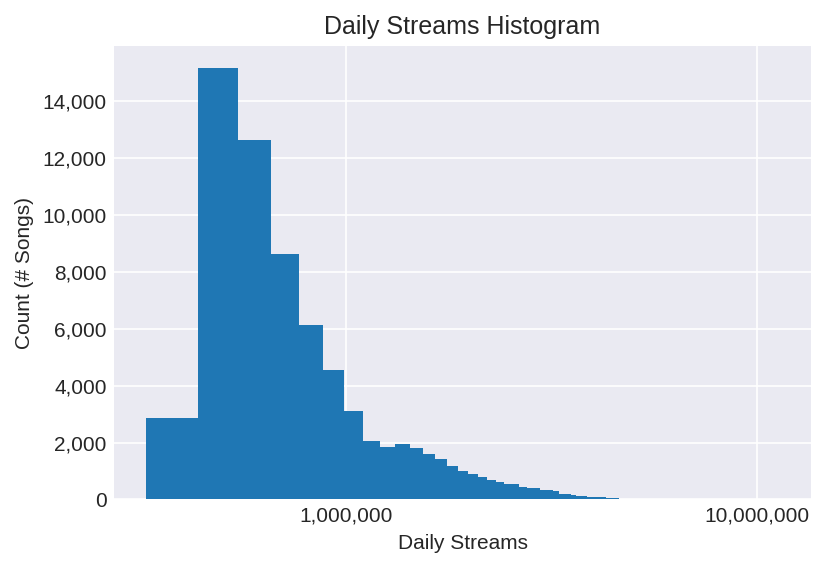

In [17]:
# How do most songs typically Perform within a day?
print((daily_df.loc[daily_df.Region == region]['Streams']).describe(include='all'))
fig, ax = plt.subplots(dpi = 150)
(daily_df.loc[daily_df.Region == region]['Streams']).hist(bins =100)
plt.xscale('log')
plt.xlabel('Daily Streams')
plt.ylabel("Count (# Songs)")
plt.title("Daily Streams Histogram")
ax.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### Daily Streams vs. Rank

In [18]:
# Plotting function for daily rank
def plot_daily_rank(daily_df, region = 'global', return_series = False, **kwargs):
    streams_mills = daily_df.loc[daily_df.Region == region].sort_values(by='Streams', ascending=False).reset_index(drop = True)
    streams_mills['Streams'] = (streams_mills['Streams'])
    ax = streams_mills['Streams'].plot(**kwargs)

    ax.set_yscale('log', )
    ax.set_xscale('log')

    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks( np.round(np.geomspace(1, len(streams_mills['Streams']),10), decimals=1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks( np.round(np.geomspace(streams_mills['Streams'].min(), streams_mills['Streams'].max(),10), decimals=1))
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


    ax.set_ylabel('Daily Streams')
    ax.set_xlabel('Rank')

    ax.set_title('Daily Streamed in %s vs Rank (log-log)' %region)

    if return_series == True:
        return ax, streams_mills

    return ax

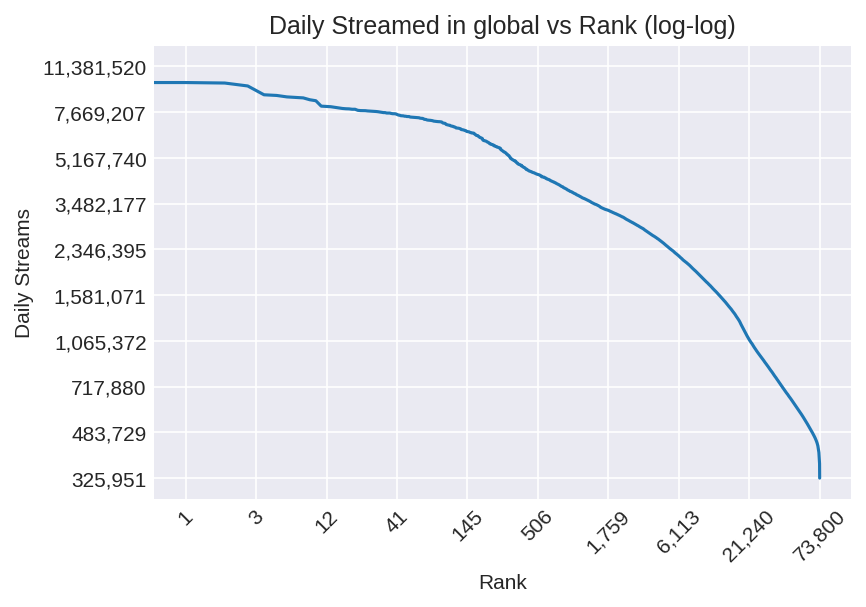

,Position,Track Name,Artist,Date,Region,Streams,URL
0,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-05-27,global,1.13815e+07,https://open.spotify.com/track/4aWmUDTfIPGksMN...
1,1,Shape of You,Ed Sheeran,2017-03-03,global,9.89106e+06,https://open.spotify.com/track/7qiZfU4dY1lWllz...
2,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-05-28,global,9.84917e+06,https://open.spotify.com/track/4aWmUDTfIPGksMN...
3,1,Shape of You,Ed Sheeran,2017-03-04,global,9.60343e+06,https://open.spotify.com/track/7qiZfU4dY1lWllz...
4,1,Shape of You,Ed Sheeran,2017-03-07,global,8.90005e+06,https://open.spotify.com/track/7qiZfU4dY1lWllz...


In [19]:
fig,ax = plt.subplots(dpi=150)
ax, streams_mills = plot_daily_rank(daily_df, region= "global",return_series=True)
plt.show()

streams_mills.head()

In [20]:
# Feel free to change these values
regions = rel_regions[:8]
df = relevant_daily

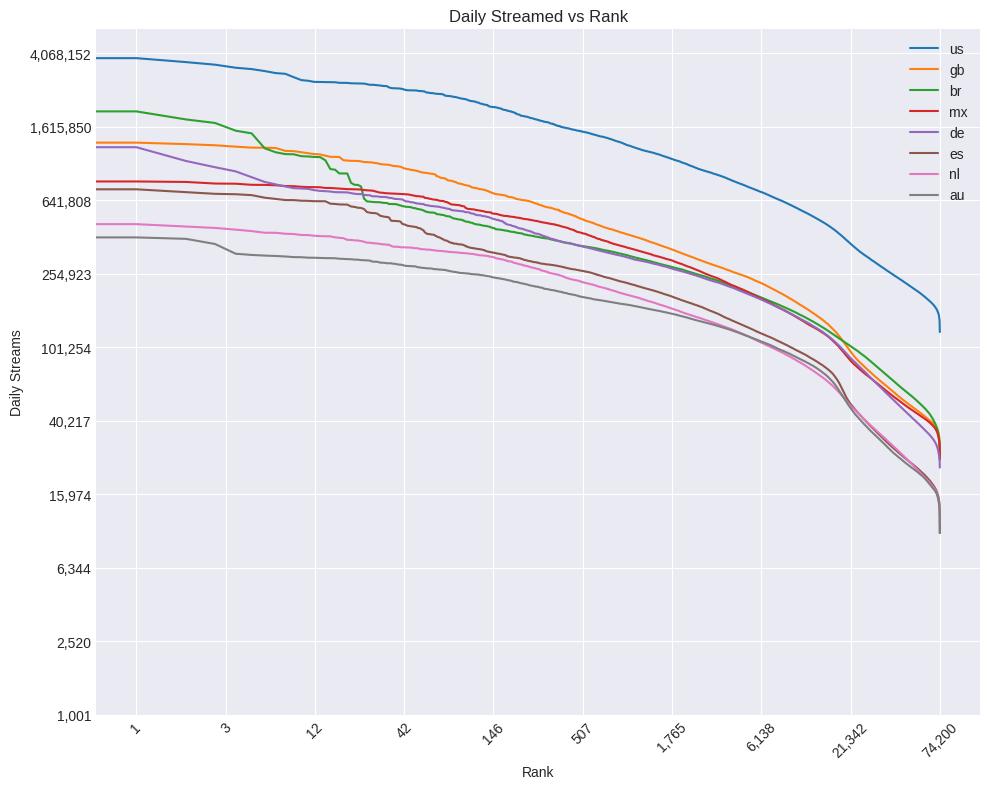

In [21]:
# Plotting Zipian Curves same axis
fig, ax = plt.subplots(1,1, dpi = 100, figsize = (10,8))
for region in regions:
    plot_daily_rank(df, region = region, return_series=False, ax = ax, label = region)

ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yticks( np.round(np.geomspace(df['Streams'].min(), df['Streams'].max(),10), decimals=1))
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.legend()
ax.set_title("Daily Streamed vs Rank")
plt.tight_layout()
plt.show()


## \# 1 Song over the year

In [22]:
daily_df.Region.unique()

array(['ar', 'at', 'au', 'be', 'bo', 'br', 'ca', 'ch', 'cl', 'co', 'cr',
       'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi', 'fr', 'gb',
       'global', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'is', 'it',
       'jp', 'lt', 'lu', 'lv', 'mx', 'my', 'nl', 'no', 'nz', 'pa', 'pe',
       'ph', 'pl', 'pt', 'py', 'se', 'sg', 'sk', 'sv', 'tr', 'tw', 'us',
       'uy'], dtype=object)

In [23]:
# There does seem to be a disparity in # of streams (global vs total of all regions)
region = 'global'
regional_df = daily_df.loc[daily_df.Region == region].sort_values(['Date', 'Streams'], ascending = [True,False])
# regional_df.Date = pd.to_datetime(regional_df.Date.values)

regional_df

,Position,Track Name,Artist,Date,Region,Streams,URL
3750,1,Starboy,The Weeknd,2017-01-01,global,3.13562e+06,https://open.spotify.com/track/5aAx2yezTd8zXrk...
3751,2,Closer,The Chainsmokers,2017-01-01,global,3.01552e+06,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...
3752,3,Let Me Love You,DJ Snake,2017-01-01,global,2.54538e+06,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...
3753,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2017-01-01,global,2.3566e+06,https://open.spotify.com/track/5knuzwU65gJK7IF...
3754,5,One Dance,Drake,2017-01-01,global,2.25989e+06,https://open.spotify.com/track/1xznGGDReH1oQq0...
...,...,...,...,...,...,...,...
3435799,196,Delicate,Taylor Swift,2018-01-09,global,"507,893",https://open.spotify.com/track/6NFyWDv5Cjfwuzo...
3435800,197,Look At Me!,XXXTENTACION,2018-01-09,global,"505,171",https://open.spotify.com/track/6eYxmK9fdL4hwLn...
3435801,198,The Scientist,Coldplay,2018-01-09,global,"504,066",https://open.spotify.com/track/75JFxkI2RXiU7L9...
3435802,199,'Till I Collapse,Eminem,2018-01-09,global,"501,337",https://open.spotify.com/track/6yr8GiTHWvFfi4o...


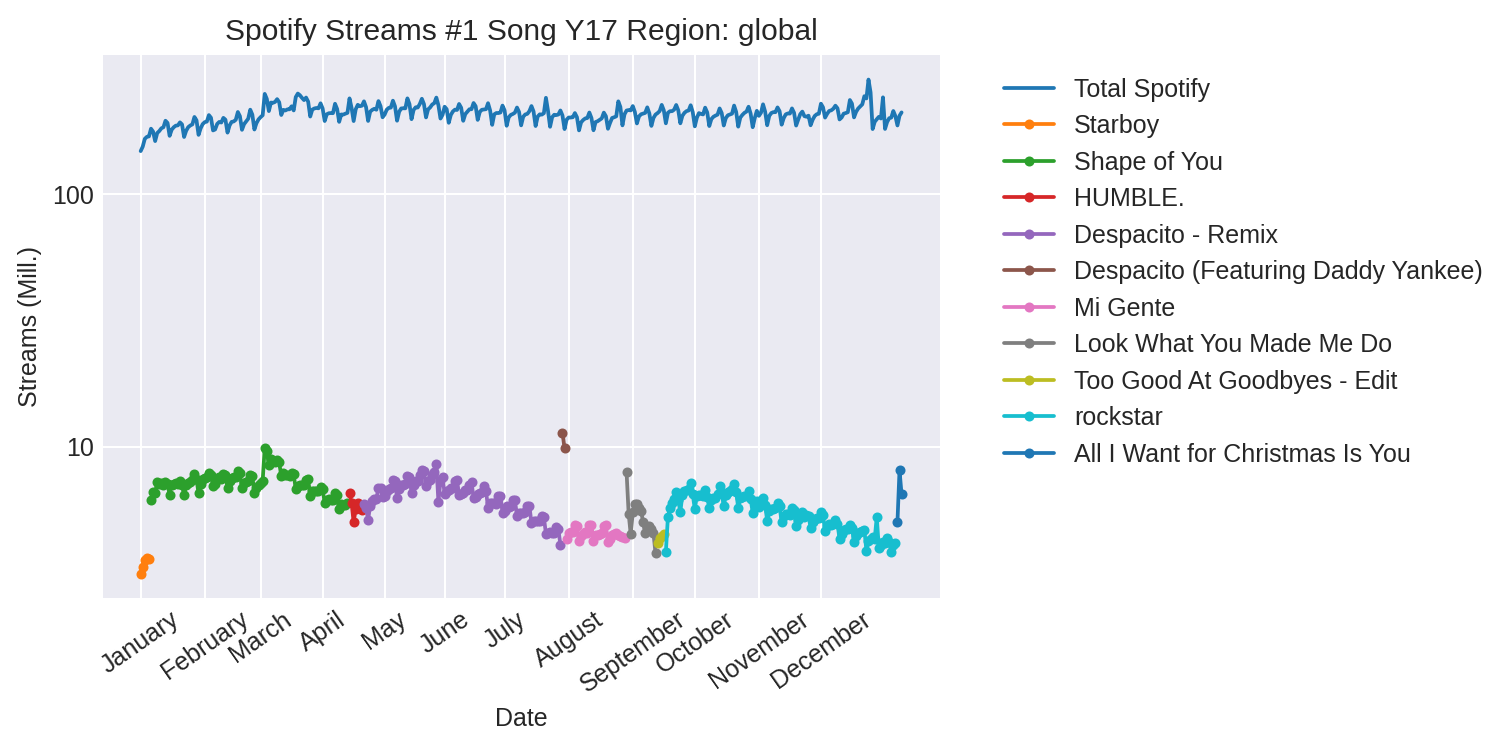

In [24]:
fig, ax = plt.subplots(1, dpi = 180)

regional_df.groupby('Date')['Streams'].sum().plot(ax = ax, label = 'Total Spotify')


n = 2 # looking at only #1 song
Tracks = (regional_df.loc[regional_df.Position < n]['Track Name'].unique())
for track in Tracks[:]:
    track_df = regional_df.loc[(regional_df.Position < n) & (regional_df['Track Name'] == track) ]#.plot('Date', 'Streams', linestyle ='-', marker = '.',  ax = ax, legend=None)

    ax.plot(track_df.Date , track_df.Streams , linestyle ='-', marker = '.', label = track)




xticks_labels, xticks = np.unique(pd.to_datetime(regional_df.Date.values[::]).month_name(), return_index=True)
xticks = np.int32(xticks/200)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation = 35)


# ax.set_xticklabels(regional_df.groupby('Date').sum().index.month_name()[xticks])

ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
ax.set_ylabel('Streams (Mill.)')


ax.legend(bbox_to_anchor=(1.05, 1.),
          ncol=1, fancybox=True, shadow=True)

ax.set_title("Spotify Streams #1 Song Y17 Region: %s" %region)
plt.show()

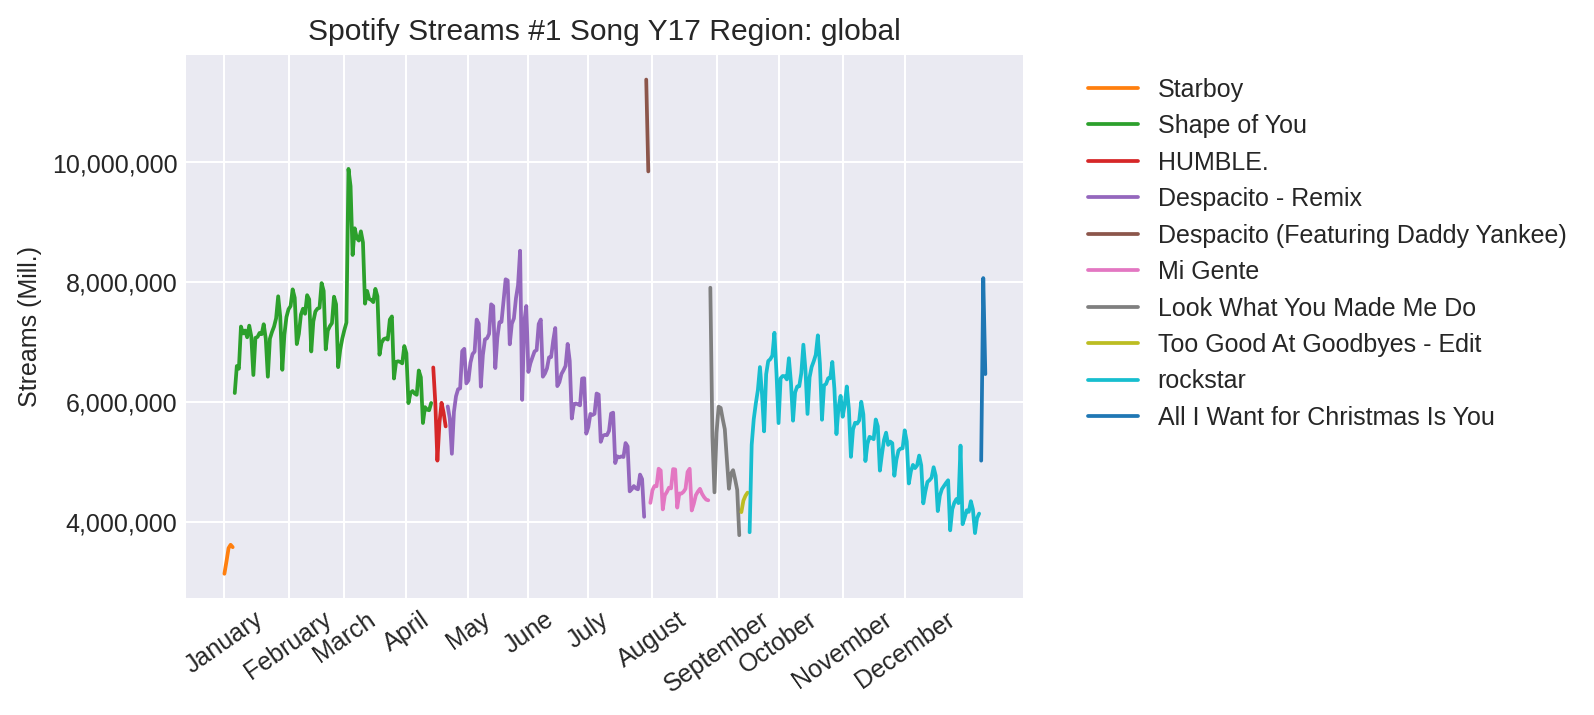

In [25]:
fig, ax = plt.subplots(1, dpi = 180)
next(ax._get_lines.prop_cycler) # to have same colors as previous plot

n = 2
Tracks = (regional_df.loc[regional_df.Position < n]['Track Name'].unique())
for track in Tracks[:]:
    track_df = regional_df.loc[(regional_df.Position < n) & (regional_df['Track Name'] == track) ]#.plot('Date', 'Streams', linestyle ='-', marker = '.',  ax = ax, legend=None)
    ax.plot(track_df.Date , track_df.Streams , linestyle ='-', marker = '', label = track)



xticks_labels, xticks = np.unique(pd.to_datetime(regional_df.Date.values[::]).month_name(), return_index=True)
xticks = np.int32(xticks/200)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation = 35)


# ax.set_xticklabels(regional_df.groupby('Date').sum().index.month_name()[xticks])

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Streams (Mill.)')


ax.legend(bbox_to_anchor=(1.05, 1.),
          ncol=1, fancybox=True, shadow=True)

ax.set_title("Spotify Streams #1 Song Y17 Region: %s" %region)
plt.show()

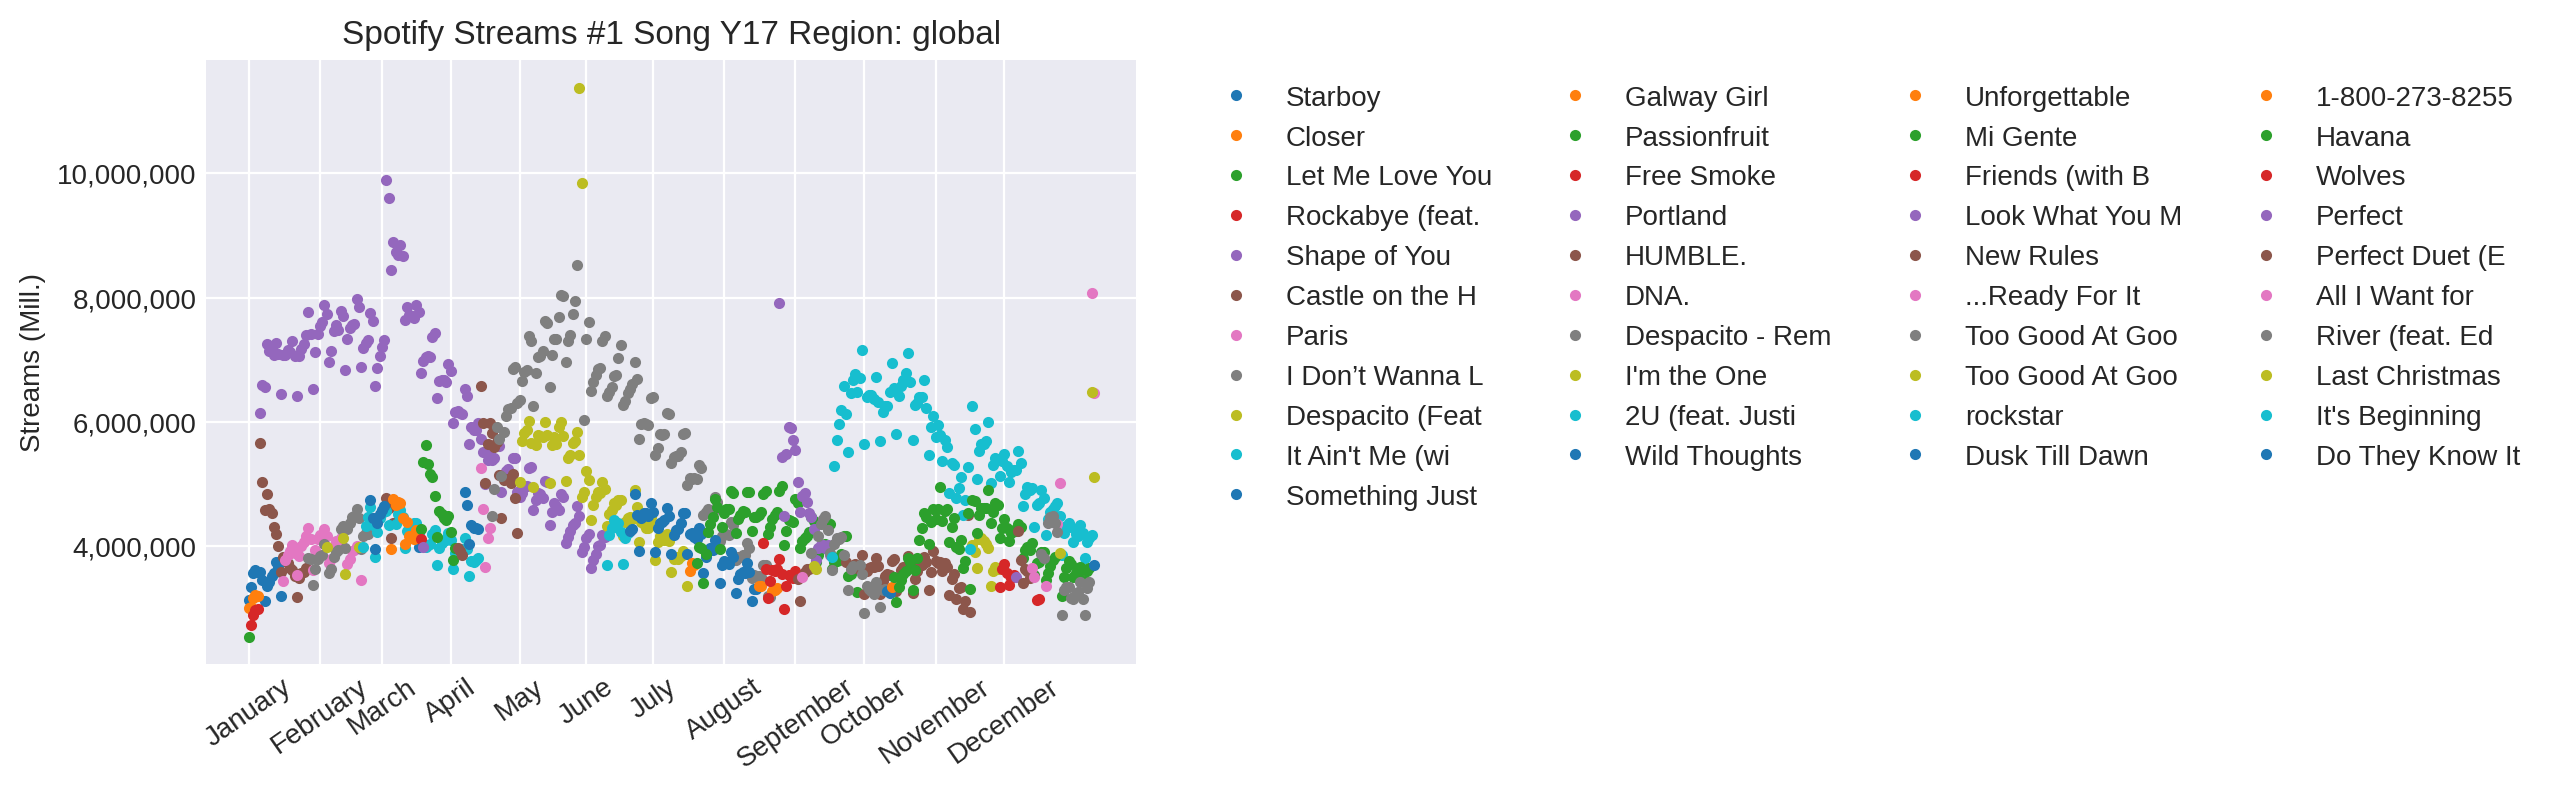

In [26]:
fig, ax = plt.subplots(1, dpi = 200)

n = 4
Tracks = (regional_df.loc[regional_df.Position < n]['Track Name'].unique())
for track in Tracks[:]:
    track_df = regional_df.loc[(regional_df.Position < n) & (regional_df['Track Name'] == track) ].sort_values(['Date', 'Streams'])#.plot('Date', 'Streams', linestyle ='-', marker = '.',  ax = ax, legend=None)

    ax.plot(track_df.Date , track_df.Streams , marker = '.', linestyle ='', label = track[:15])




xticks_labels, xticks = np.unique(pd.to_datetime(regional_df.Date.values[::]).month_name(), return_index=True)
xticks = np.int32(xticks/200)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation = 35)

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Streams (Mill.)')

ax.set_title("Spotify Streams #1 Song Y17 Region: %s" %region)

plt.legend(bbox_to_anchor=(1.05, 1),
          ncol=4, fancybox=True, shadow=True)
plt.show()

In [27]:
def plot_Top_Songs(region, ax, n=3):
    n +=1
    regional_df = daily_df.loc[daily_df.Region == region].sort_values(['Date', 'Streams'], ascending = [True,False])
    Tracks = (regional_df.loc[regional_df.Position < n]['Track Name'].unique())
    for track in Tracks[:]:
        track_df = regional_df.loc[(regional_df.Position < n) & (regional_df['Track Name'] == track) ].sort_values(['Date', 'Streams'])#.plot('Date', 'Streams', linestyle ='-', marker = '.',  ax = ax, legend=None)

        ax.plot(track_df.Date , track_df.Streams , marker = '.', linestyle ='', label = track[:15])




    xticks_labels, xticks = np.unique(pd.to_datetime(regional_df.Date.values[::]).month_name(), return_index=True)
    xticks = np.int32(xticks/200)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_labels, rotation = 35)

    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_ylabel('Streams (Mill.)')

    ax.set_title("Spotify Streams Top Songs Y17 Region: %s" %region)



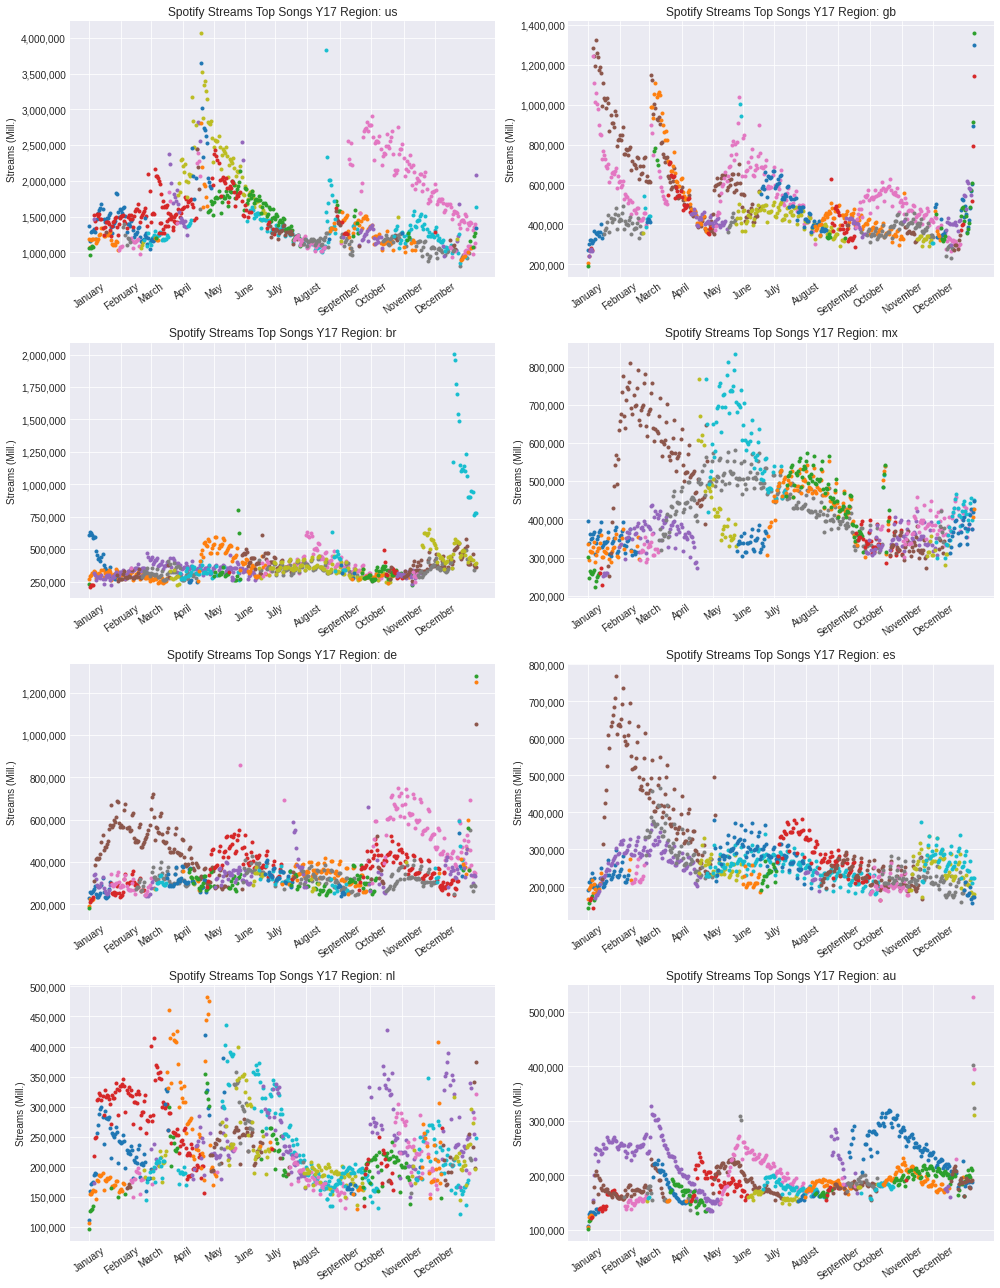

In [28]:
fig, axs = plt.subplots(4,2, figsize = (14,18))

for region, ax in zip(regions, axs.flatten()):
    
    plot_Top_Songs(region, ax= ax)

plt.tight_layout()
plt.show()

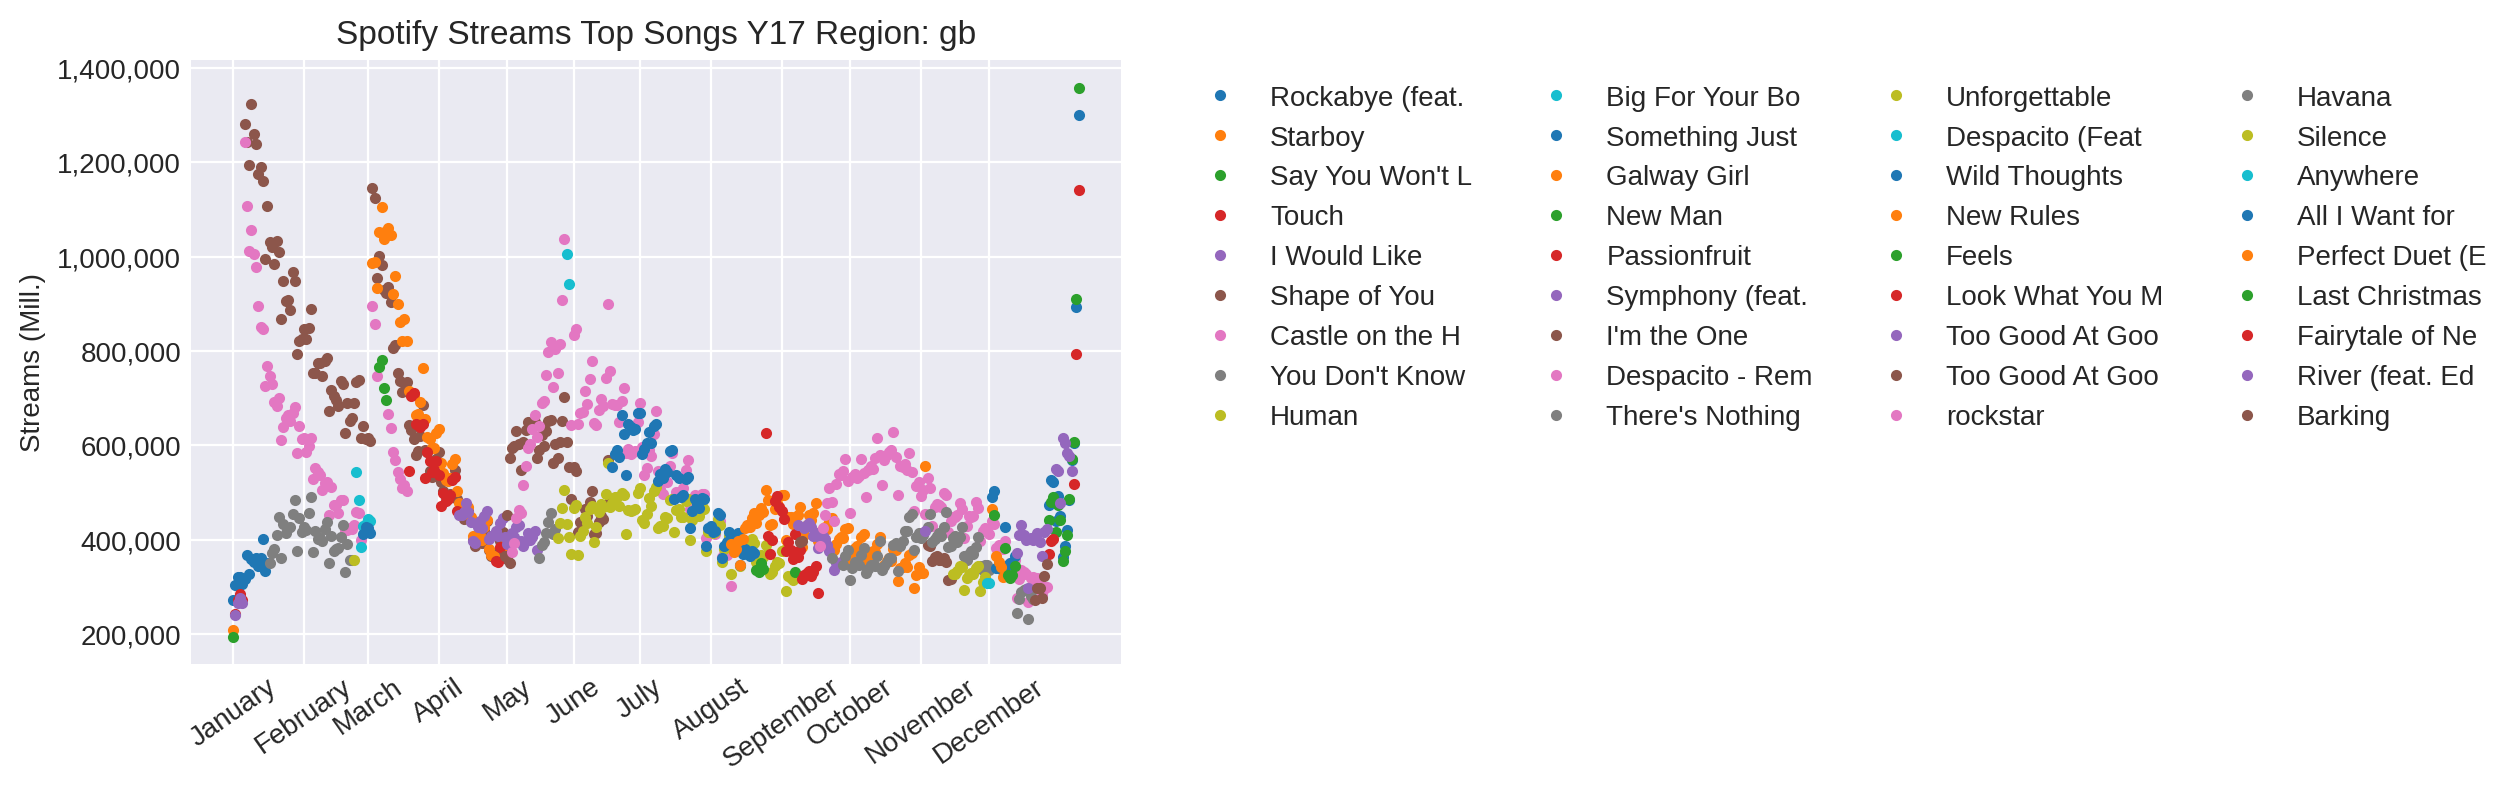

In [29]:
region = 'gb'
fig, ax = plt.subplots(1, dpi=200)

plot_Top_Songs(region, ax)
plt.legend(bbox_to_anchor=(1.05, 1),
          ncol=4, fancybox=True, shadow=True)
          
plt.show()